In [2]:
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt
from skimage import io, color

In [5]:
# Load the image and convert to grayscale
image = io.imread('horse.jpeg')
gray_image = color.rgb2gray(image)

# Reshape the grayscale image into a feature matrix
height, width = gray_image.shape
feature_matrix = gray_image.reshape(-1, 1)

# Normalize the feature matrix
feature_matrix = (feature_matrix - feature_matrix.min()) / (feature_matrix.max() - feature_matrix.min())



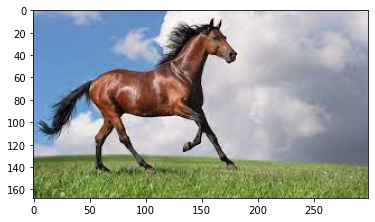

In [6]:
plt.imshow(image)

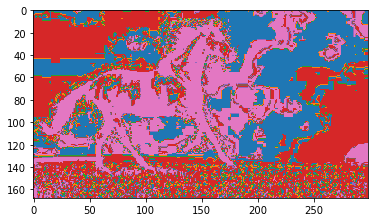

In [12]:
som_grid_rows = 30
som_grid_columns = 30
input_dimensions = feature_matrix.shape[1]
sigma = 1.0
learning_rate = 0.5

# Initialize SOM
som = MiniSom(som_grid_rows, som_grid_columns, input_dimensions, sigma=sigma, learning_rate=learning_rate)

# Training the SOM
som.train_random(feature_matrix, 100)  # Train for 100 iterations

# Assign each pixel to the corresponding cluster
segmented_image = np.zeros_like(gray_image)
for i in range(height):
    for j in range(width):
        winner = som.winner(feature_matrix[i * width + j])
        winner_index = winner[0] * som_grid_columns + winner[1]
        segmented_image[i, j] = winner_index

# Visualize the segmented image
plt.imshow(segmented_image, cmap='tab10')
plt.show()
